# DermaLens:- Skin Disease Diagnosis using Machine Learning

## Importing Dataset

In [1]:
import os
import pandas as pd

# Define the root directory of your training dataset
root_dir = "/kaggle/input/dermnet/train"

# Supported image file extensions
image_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.gif', '.tiff']

# Initialize lists to store image paths and labels
image_paths = []
labels = []

# Traverse the directory
for subdir, _, files in os.walk(root_dir):
    for file in files:
        # Check if the file is an image
        if any(file.lower().endswith(ext) for ext in image_extensions):
            # Get the full path of the image
            image_path = os.path.join(subdir, file)

            # Get the label(folder name)
            label = os.path.basename(subdir)
            #append to lists
            image_paths.append(image_path)
            labels.append(label)

#Create a dataframe
df = pd.DataFrame({'Image_Path': image_paths, 'Disease': labels})
df

Image_Path  \
0      /kaggle/input/dermnet/train/Light Diseases and...   
1      /kaggle/input/dermnet/train/Light Diseases and...   
2      /kaggle/input/dermnet/train/Light Diseases and...   
3      /kaggle/input/dermnet/train/Light Diseases and...   
4      /kaggle/input/dermnet/train/Light Diseases and...   
...                                                  ...   
15552  /kaggle/input/dermnet/train/Warts Molluscum an...   
15553  /kaggle/input/dermnet/train/Warts Molluscum an...   
15554  /kaggle/input/dermnet/train/Warts Molluscum an...   
15555  /kaggle/input/dermnet/train/Warts Molluscum an...   
15556  /kaggle/input/dermnet/train/Warts Molluscum an...   

                                            Disease  
0      Light Diseases and Disorders of Pigmentation  
1      Light Diseases and Disorders of Pigmentation  
2      Light Diseases and Disorders of Pigmentation  
3      Light Diseases and Disorders of Pigmentation  
4      Light Diseases and Disorders of Pigmentation  
...                                             ...  
15552    Warts Molluscum and other Viral Infections  
15553    Warts Molluscum and other Viral Infections  
15554    Warts Molluscum and other Viral Infections  
15555    Warts Molluscum and other Viral Infections  
15556    Warts Molluscum and other Viral Infections  

[15557 rows x 2 columns]

## Looking at an image

Light Diseases and Disorders of Pigmentation
Image Size:(720, 480)


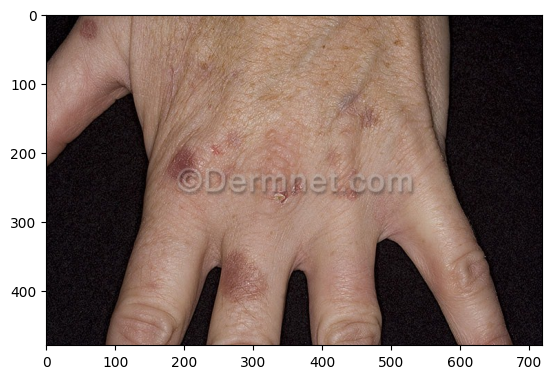

In [2]:
import matplotlib.pyplot as plt
from PIL import Image

def First_Image_Path():
    first_image_path = df['Image_Path'].iloc[100]
    print(df['Disease'].iloc[100])
    image = Image.open(first_image_path)
    print(f"Image Size:{image.size}")
    plt.imshow(image)
    plt.show()

First_Image_Path()

## Removing Corrupt Images:-

In [3]:

from PIL import Image

def is_valid_image(Image_Path):
    try:
        img = Image.open(Image_Path)
        img.verify()
        return True
        
    except(IOError, SyntaxError):
        return False

df = df[df['Image_Path'].apply(is_valid_image)]
df

Image_Path  \
0      /kaggle/input/dermnet/train/Light Diseases and...   
1      /kaggle/input/dermnet/train/Light Diseases and...   
2      /kaggle/input/dermnet/train/Light Diseases and...   
3      /kaggle/input/dermnet/train/Light Diseases and...   
4      /kaggle/input/dermnet/train/Light Diseases and...   
...                                                  ...   
15552  /kaggle/input/dermnet/train/Warts Molluscum an...   
15553  /kaggle/input/dermnet/train/Warts Molluscum an...   
15554  /kaggle/input/dermnet/train/Warts Molluscum an...   
15555  /kaggle/input/dermnet/train/Warts Molluscum an...   
15556  /kaggle/input/dermnet/train/Warts Molluscum an...   

                                            Disease  
0      Light Diseases and Disorders of Pigmentation  
1      Light Diseases and Disorders of Pigmentation  
2      Light Diseases and Disorders of Pigmentation  
3      Light Diseases and Disorders of Pigmentation  
4      Light Diseases and Disorders of Pigmentation  
...                                             ...  
15552    Warts Molluscum and other Viral Infections  
15553    Warts Molluscum and other Viral Infections  
15554    Warts Molluscum and other Viral Infections  
15555    Warts Molluscum and other Viral Infections  
15556    Warts Molluscum and other Viral Infections  

[15557 rows x 2 columns]

## Removing Duplicate Images:-

In [4]:
from imagehash import average_hash

def compute_hash(Image_Path):
    img = Image.open(Image_Path)
    return average_hash(img)

df['image_hash'] = df['Image_Path'].apply(compute_hash)
df = df.drop_duplicates(subset=['image_hash'])
df = df.drop(columns=['image_hash'])
df

Image_Path  \
0      /kaggle/input/dermnet/train/Light Diseases and...   
1      /kaggle/input/dermnet/train/Light Diseases and...   
2      /kaggle/input/dermnet/train/Light Diseases and...   
3      /kaggle/input/dermnet/train/Light Diseases and...   
4      /kaggle/input/dermnet/train/Light Diseases and...   
...                                                  ...   
15551  /kaggle/input/dermnet/train/Warts Molluscum an...   
15552  /kaggle/input/dermnet/train/Warts Molluscum an...   
15553  /kaggle/input/dermnet/train/Warts Molluscum an...   
15554  /kaggle/input/dermnet/train/Warts Molluscum an...   
15556  /kaggle/input/dermnet/train/Warts Molluscum an...   

                                            Disease  
0      Light Diseases and Disorders of Pigmentation  
1      Light Diseases and Disorders of Pigmentation  
2      Light Diseases and Disorders of Pigmentation  
3      Light Diseases and Disorders of Pigmentation  
4      Light Diseases and Disorders of Pigmentation  
...                                             ...  
15551    Warts Molluscum and other Viral Infections  
15552    Warts Molluscum and other Viral Infections  
15553    Warts Molluscum and other Viral Infections  
15554    Warts Molluscum and other Viral Infections  
15556    Warts Molluscum and other Viral Infections  

[14599 rows x 2 columns]

## Looking at the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14599 entries, 0 to 15556
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Image_Path  14599 non-null  object
 1   Disease     14599 non-null  object
dtypes: object(2)
memory usage: 342.2+ KB


In [6]:
print(df.head())
print(df["Disease"].value_counts())

                                          Image_Path  \
0  /kaggle/input/dermnet/train/Light Diseases and...   
1  /kaggle/input/dermnet/train/Light Diseases and...   
2  /kaggle/input/dermnet/train/Light Diseases and...   
3  /kaggle/input/dermnet/train/Light Diseases and...   
4  /kaggle/input/dermnet/train/Light Diseases and...   

                                        Disease  
0  Light Diseases and Disorders of Pigmentation  
1  Light Diseases and Disorders of Pigmentation  
2  Light Diseases and Disorders of Pigmentation  
3  Light Diseases and Disorders of Pigmentation  
4  Light Diseases and Disorders of Pigmentation  
Disease
Psoriasis pictures Lichen Planus and related diseases                 1352
Seborrheic Keratoses and other Benign Tumors                          1317
Tinea Ringworm Candidiasis and other Fungal Infections                1246
Eczema Photos                                                         1119
Actinic Keratosis Basal Cell Carcinoma and other Malign

## Preprocessing images

In [7]:
import tensorflow as tf

IMG_SIZE = 299  # InceptionV3 expects 299x299
BATCH_SIZE = 32

def preprocess_train(image_path, label):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = data_augmentation(image)
    image = tf.keras.applications.inception_v3.preprocess_input(image)
    return image, label

def preprocess_val(image_path, label):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = tf.keras.applications.inception_v3.preprocess_input(image)
    return image, label

2025-04-28 01:38:20.171623: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745804300.370898      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745804300.428481      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Analysing class distribution

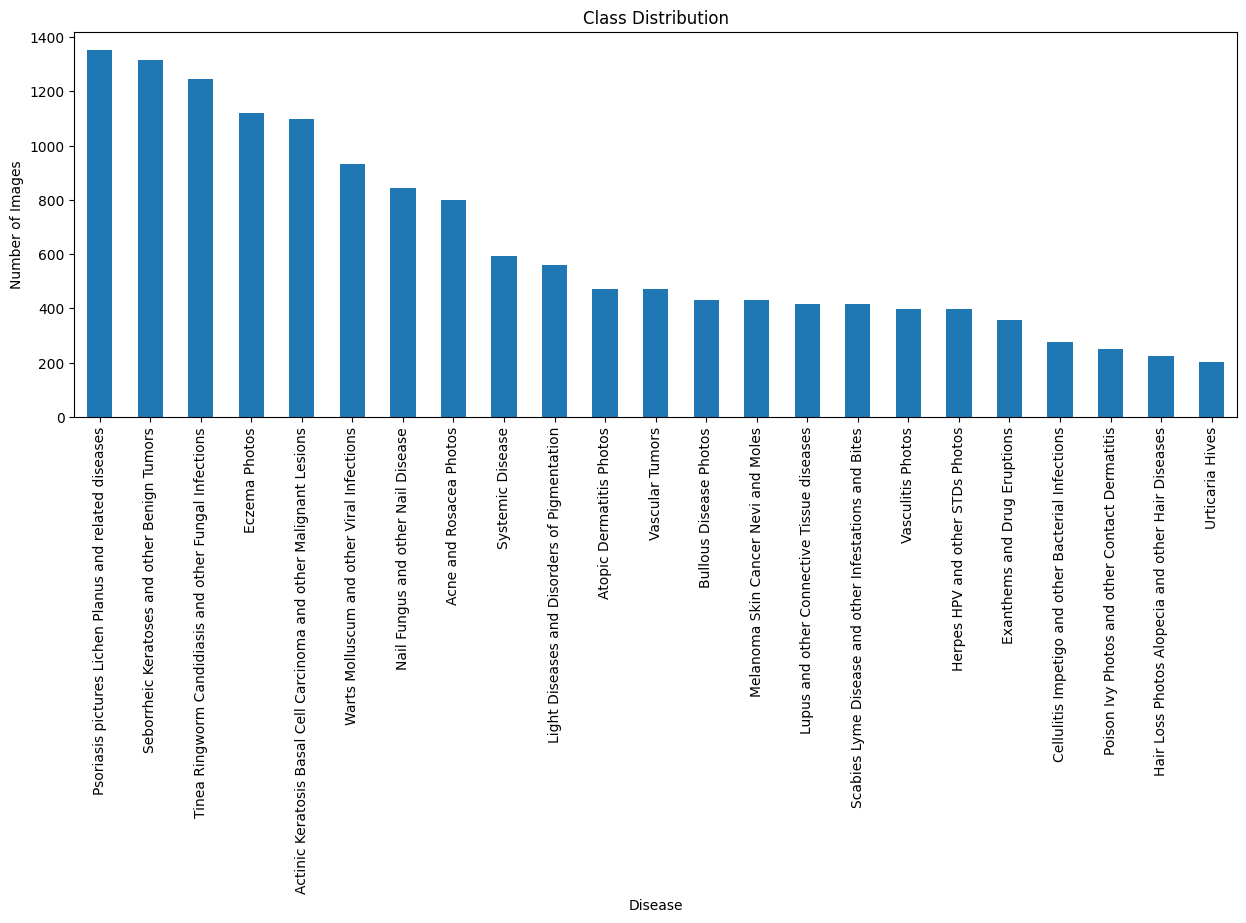

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
df['Disease'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Disease')
plt.ylabel('Number of Images')
plt.show()


## Encoding labels for processing

In [9]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['label_encoded'] = label_encoder.fit_transform(df['Disease'])


## Handling Class Imbalance

In [10]:
#from sklearn.utils import class_weight
import numpy as np

# Get all labels
labels = df['label_encoded']

from sklearn.utils import resample
import pandas as pd

# Assuming your dataframe is called 'df' with 'Image_Path' and 'Disease'
dfs = []
target_samples = df['Disease'].value_counts().max()  # Match the largest class

for label in df['Disease'].unique():
    df_label = df[df['Disease'] == label]
    df_label_upsampled = resample(
        df_label,
        replace=True,
        n_samples=target_samples,
        random_state=42
    )
    dfs.append(df_label_upsampled)

# Combine and shuffle
df = pd.concat(dfs).sample(frac=1, random_state=42).reset_index(drop=True)

print(df['Disease'].value_counts())

Disease
Tinea Ringworm Candidiasis and other Fungal Infections                1352
Seborrheic Keratoses and other Benign Tumors                          1352
Acne and Rosacea Photos                                               1352
Systemic Disease                                                      1352
Vascular Tumors                                                       1352
Nail Fungus and other Nail Disease                                    1352
Bullous Disease Photos                                                1352
Light Diseases and Disorders of Pigmentation                          1352
Poison Ivy Photos and other Contact Dermatitis                        1352
Urticaria Hives                                                       1352
Hair Loss Photos Alopecia and other Hair Diseases                     1352
Eczema Photos                                                         1352
Warts Molluscum and other Viral Infections                            1352
Lupus and other C

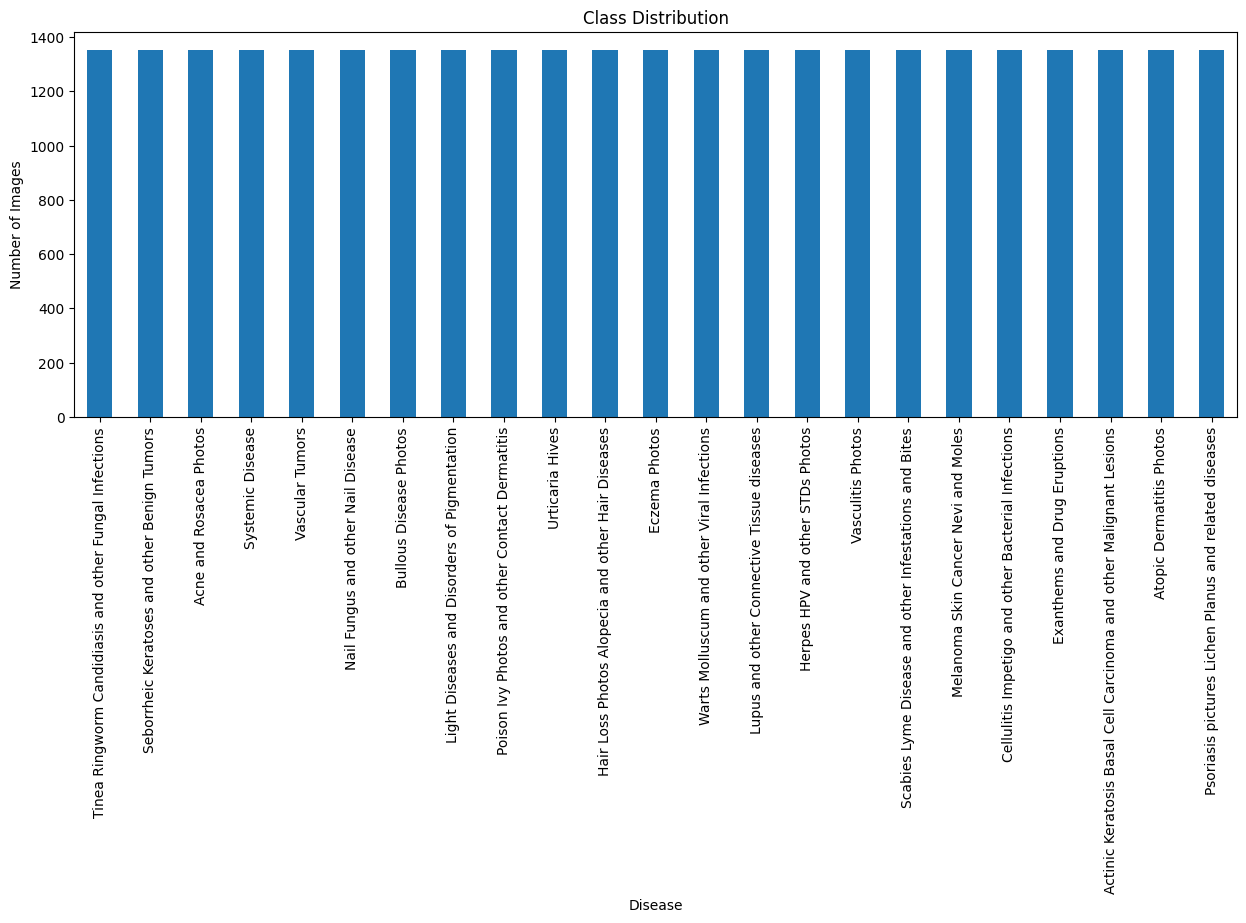

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
df['Disease'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Disease')
plt.ylabel('Number of Images')
plt.show()


## Splitting the datasets:

In [12]:
from sklearn.model_selection import train_test_split

# Split dataset
train_paths, val_paths, train_labels, val_labels = train_test_split(
    df['Image_Path'],
    df['label_encoded'],
    test_size=0.2,
    stratify=df['label_encoded'],
    random_state=42
)

## Data Augmentation

In [13]:
from tensorflow.keras import layers

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1),
    layers.RandomBrightness(0.2),
])


I0000 00:00:1745804314.414345      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


## Creating Tensorflow Datasets

In [14]:
# Tensorflow Datasets
train_ds = tf.data.Dataset.from_tensor_slices((train_paths.values, tf.one_hot(train_labels.values, depth=23)))
val_ds = tf.data.Dataset.from_tensor_slices((val_paths.values, tf.one_hot(val_labels.values, depth=23)))

# Map preprocessing
train_ds = train_ds.map(preprocess_train, num_parallel_calls=tf.data.AUTOTUNE)
val_ds = val_ds.map(preprocess_val, num_parallel_calls=tf.data.AUTOTUNE)

# Shuffle, Batch, Prefetch
train_ds = train_ds.shuffle(buffer_size=1000).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)


## Model Building

### **InceptionV3**

In [15]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import layers, models

# Load pretrained InceptionV3
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
base_model.trainable = False  # Freeze initially

# Create Model
inputs = tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = base_model(inputs, training=False)  # Important: training=False for frozen model
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(23, activation='softmax')(x)  # 23 classes

model = models.Model(inputs, outputs)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# Compiling the model

In [16]:
from tensorflow.keras.losses import CategoricalCrossentropy

loss_fn = CategoricalCrossentropy(label_smoothing=0.1)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss=loss_fn,
    metrics=['accuracy']
)


## Setting Up Callbacks

In [17]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',        # Watch validation loss
    factor=0.5,                # Reduce LR by a factor of 0.5
    patience=3,                # After 3 epochs of no improvement
    min_lr=1e-7,               # Lower bound for LR
    verbose=1
)
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

model_checkpoint = ModelCheckpoint(
    'best_model.keras',
    monitor='val_loss',
    save_best_only=True
)


## Training the model

In [18]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    callbacks=[early_stop, model_checkpoint,reduce_lr]
)

Epoch 1/20


I0000 00:00:1745804339.624419      63 service.cc:148] XLA service 0x7bdd98002240 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1745804339.625479      63 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1745804341.594529      63 cuda_dnn.cc:529] Loaded cuDNN version 90300


  2/778 ━━━━━━━━━━━━━━━━━━━━ 1:09 90ms/step - accuracy: 0.1016 - loss: 3.6327  

I0000 00:00:1745804349.535689      63 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


778/778 ━━━━━━━━━━━━━━━━━━━━ 321s 374ms/step - accuracy: 0.1721 - loss: 3.0437 - val_accuracy: 0.2928 - val_loss: 2.5584 - learning_rate: 0.0010
Epoch 2/20
778/778 ━━━━━━━━━━━━━━━━━━━━ 281s 350ms/step - accuracy: 0.2691 - loss: 2.6802 - val_accuracy: 0.3283 - val_loss: 2.4656 - learning_rate: 0.0010
Epoch 3/20
778/778 ━━━━━━━━━━━━━━━━━━━━ 283s 351ms/step - accuracy: 0.2836 - loss: 2.6405 - val_accuracy: 0.3405 - val_loss: 2.4427 - learning_rate: 0.0010
Epoch 4/20
778/778 ━━━━━━━━━━━━━━━━━━━━ 283s 352ms/step - accuracy: 0.2982 - loss: 2.6056 - val_accuracy: 0.3444 - val_loss: 2.4227 - learning_rate: 0.0010
Epoch 5/20
778/778 ━━━━━━━━━━━━━━━━━━━━ 278s 344ms/step - accuracy: 0.3017 - loss: 2.6061 - val_accuracy: 0.3571 - val_loss: 2.3984 - learning_rate: 0.0010
Epoch 6/20
778/778 ━━━━━━━━━━━━━━━━━━━━ 276s 343ms/step - accuracy: 0.3031 - loss: 2.5969 - val_accuracy: 0.3614 - val_loss: 2.3599 - learning_rate: 0.0010
Epoch 7/20
778/778 ━━━━━━━━━━━━━━━━━━━━ 276s 343ms/step - accuracy: 0.3081 

## Evalutaing after first training

195/195 ━━━━━━━━━━━━━━━━━━━━ 12s 63ms/step - accuracy: 0.3805 - loss: 2.3106
Validation Loss: 2.3095
Validation Accuracy: 0.3841
195/195 ━━━━━━━━━━━━━━━━━━━━ 24s 89ms/step
                                                                    precision    recall  f1-score   support

                                           Acne and Rosacea Photos       0.41      0.55      0.47       270
Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions       0.38      0.23      0.29       270
                                          Atopic Dermatitis Photos       0.36      0.48      0.41       270
                                            Bullous Disease Photos       0.30      0.30      0.30       270
                Cellulitis Impetigo and other Bacterial Infections       0.20      0.33      0.25       271
                                                     Eczema Photos       0.33      0.33      0.33       270
                                      Exanthems and Drug Eruptions     

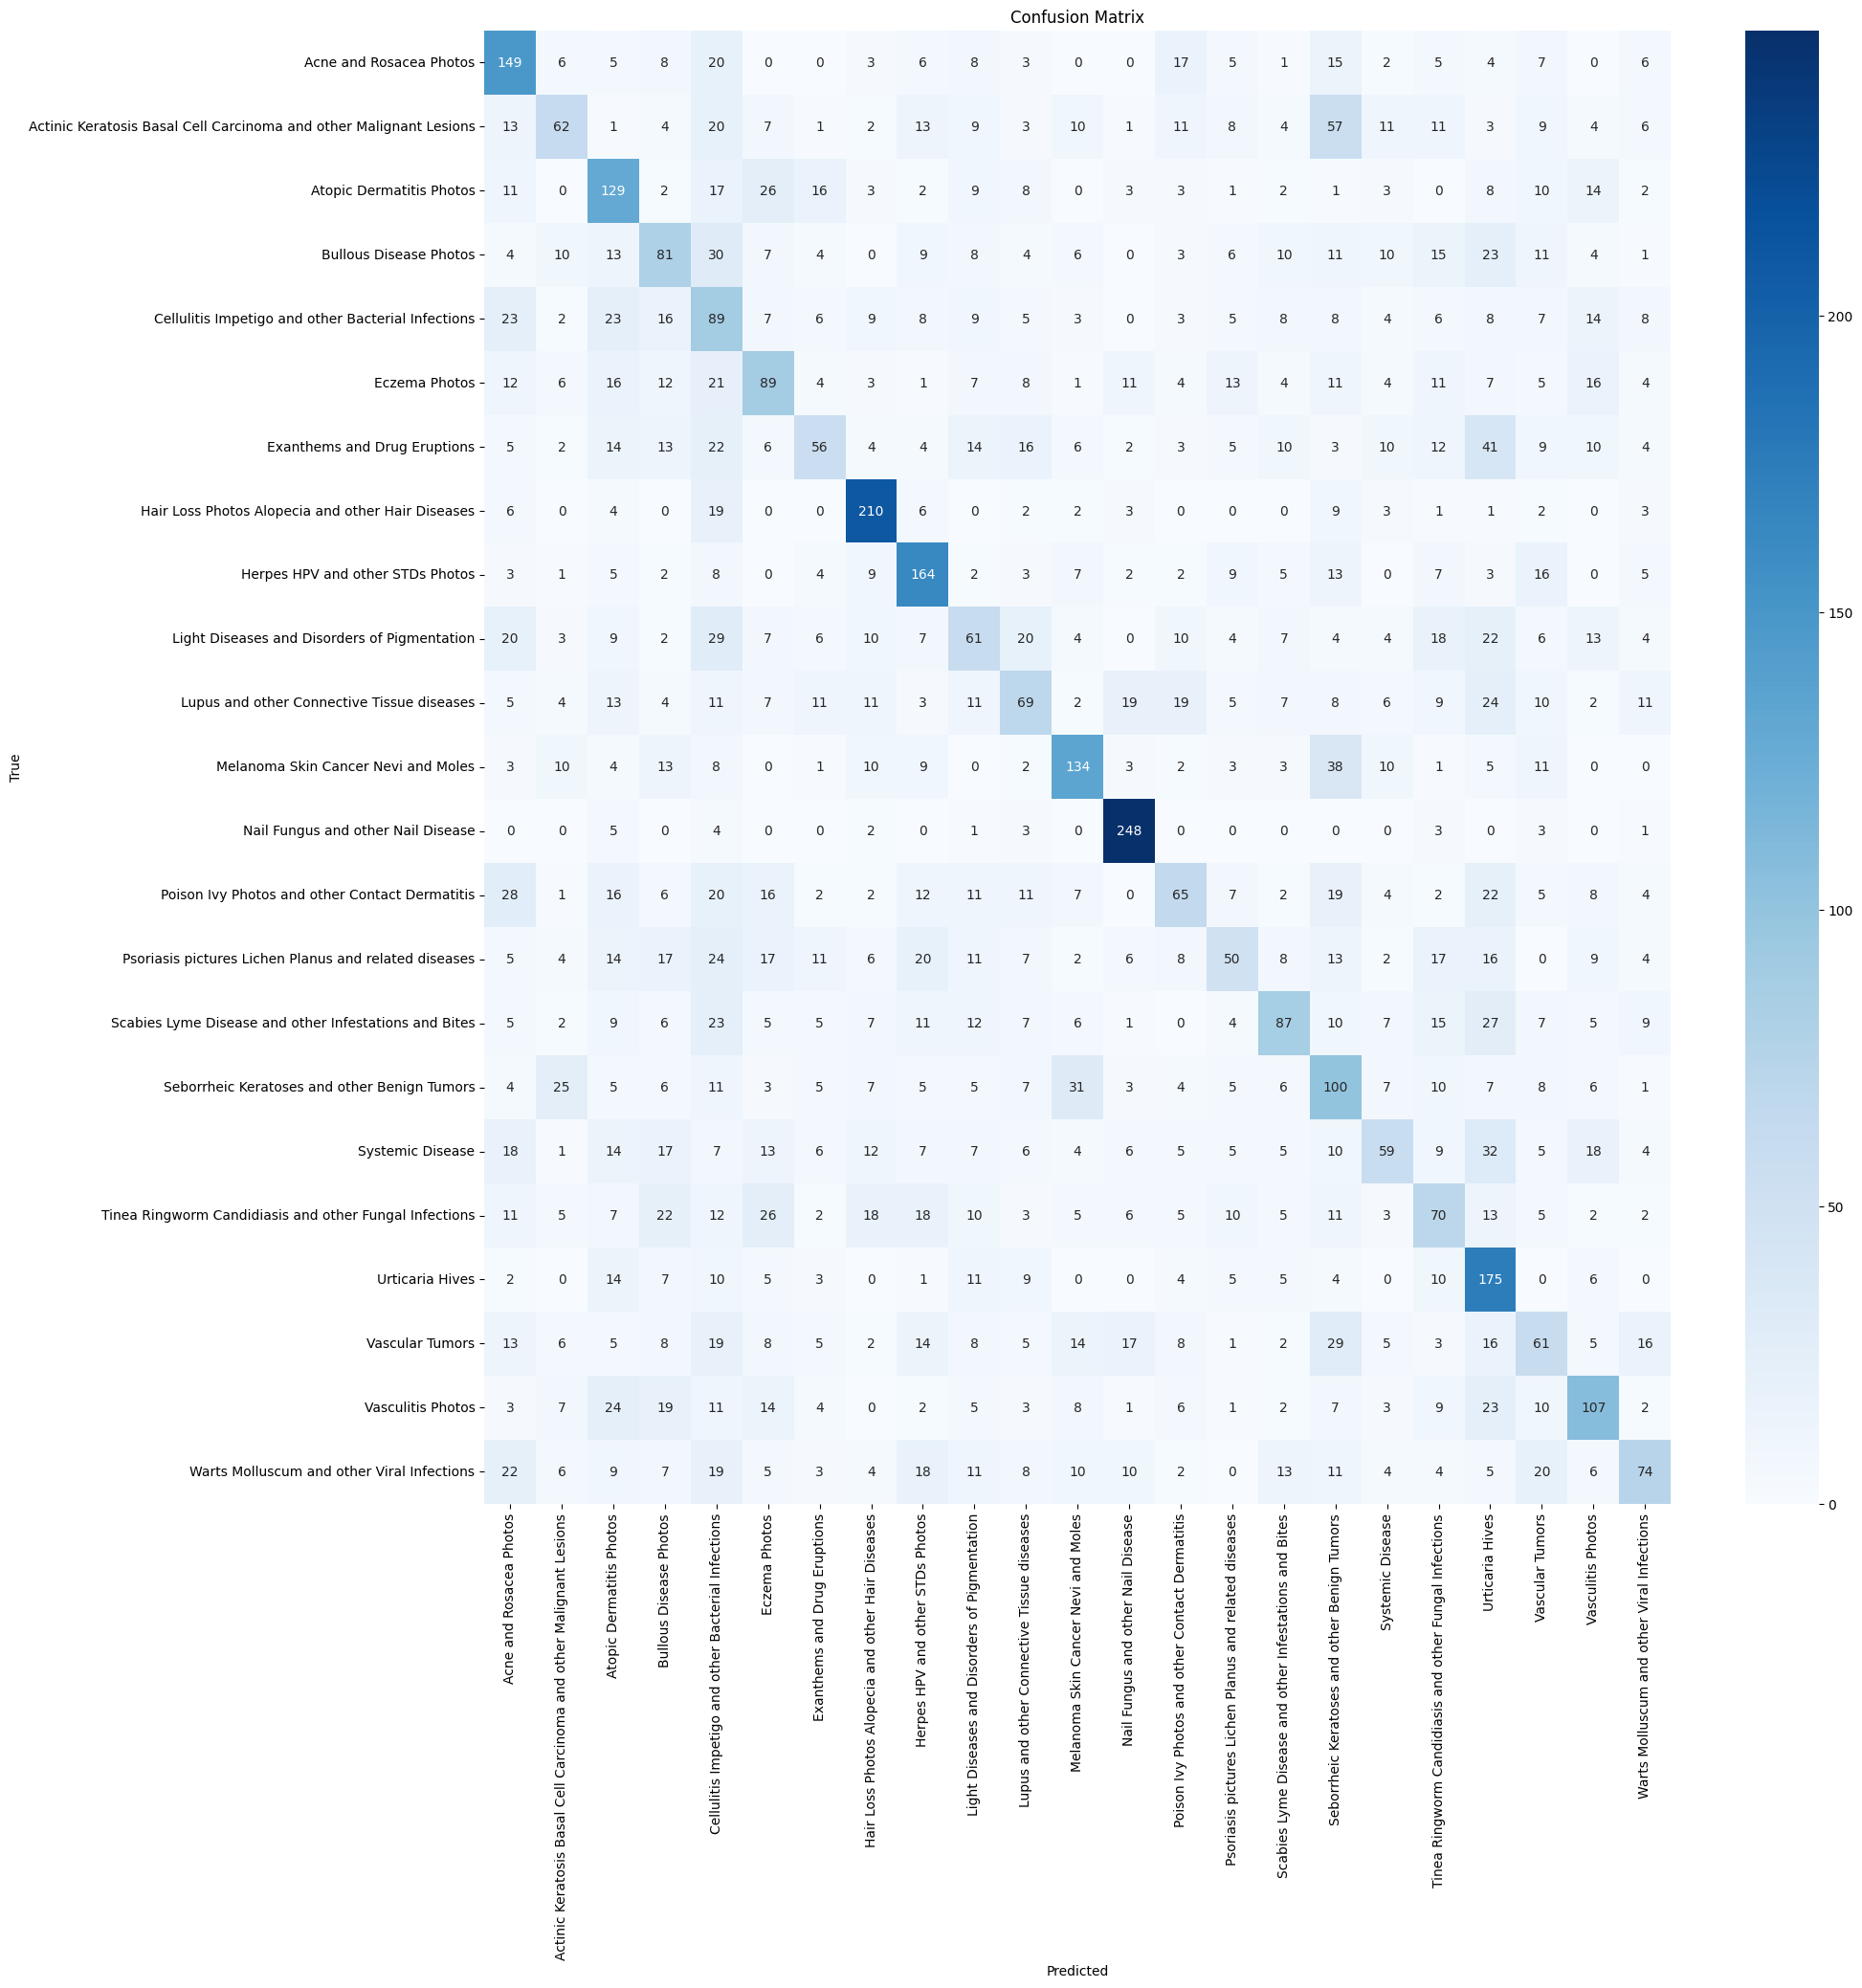

In [19]:
# Import necessary libraries
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 

# 1. Evaluate
val_loss, val_accuracy = model.evaluate(val_ds)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

# 2. Predict
y_pred_probs = model.predict(val_ds)
y_pred = np.argmax(y_pred_probs, axis=1)
# Get true labels from one-hot encoded validation set
y_true = []
for images, labels in val_ds.unbatch():
    y_true.append(np.argmax(labels.numpy()))
y_true = np.array(y_true)

# 3. Classification Report
print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))

# 4. Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(20, 20))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


## Finetuning the model

In [20]:
# Unfreeze the top layers of InceptionV3
base_model.trainable = True

# Optionally, you can unfreeze only the top N layers:
fine_tune_at = 249  
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

# Compile the model again with lower learning rate
from tensorflow.keras.optimizers import Adam

loss_fn = CategoricalCrossentropy(label_smoothing=0.1)
model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss= loss_fn,
    metrics=['accuracy']
)

# Now fine-tune the model
fine_tune_epochs = 30

history_fine = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=fine_tune_epochs,
    callbacks=[early_stop, reduce_lr]
)


Epoch 1/30
778/778 ━━━━━━━━━━━━━━━━━━━━ 332s 379ms/step - accuracy: 0.2804 - loss: 2.6424 - val_accuracy: 0.3921 - val_loss: 2.2927 - learning_rate: 1.0000e-05
Epoch 2/30
778/778 ━━━━━━━━━━━━━━━━━━━━ 287s 356ms/step - accuracy: 0.3557 - loss: 2.4054 - val_accuracy: 0.4225 - val_loss: 2.1949 - learning_rate: 1.0000e-05
Epoch 3/30
778/778 ━━━━━━━━━━━━━━━━━━━━ 287s 357ms/step - accuracy: 0.3913 - loss: 2.2950 - val_accuracy: 0.4514 - val_loss: 2.1200 - learning_rate: 1.0000e-05
Epoch 4/30
778/778 ━━━━━━━━━━━━━━━━━━━━ 293s 364ms/step - accuracy: 0.4184 - loss: 2.2018 - val_accuracy: 0.4757 - val_loss: 2.0561 - learning_rate: 1.0000e-05
Epoch 5/30
778/778 ━━━━━━━━━━━━━━━━━━━━ 287s 357ms/step - accuracy: 0.4551 - loss: 2.1192 - val_accuracy: 0.5000 - val_loss: 2.0008 - learning_rate: 1.0000e-05
Epoch 6/30
778/778 ━━━━━━━━━━━━━━━━━━━━ 295s 366ms/step - accuracy: 0.4804 - loss: 2.0582 - val_accuracy: 0.5159 - val_loss: 1.9497 - learning_rate: 1.0000e-05
Epoch 7/30
778/778 ━━━━━━━━━━━━━━━━━━━━ 

## Again evaluating after fine tuning

195/195 ━━━━━━━━━━━━━━━━━━━━ 12s 63ms/step - accuracy: 0.7703 - loss: 1.3390
Validation Loss: 1.3277
Validation Accuracy: 0.7712
195/195 ━━━━━━━━━━━━━━━━━━━━ 24s 87ms/step
                                                                    precision    recall  f1-score   support

                                           Acne and Rosacea Photos       0.79      0.75      0.77       270
Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions       0.76      0.53      0.62       270
                                          Atopic Dermatitis Photos       0.81      0.87      0.84       270
                                            Bullous Disease Photos       0.80      0.82      0.81       270
                Cellulitis Impetigo and other Bacterial Infections       0.81      0.81      0.81       271
                                                     Eczema Photos       0.63      0.59      0.61       270
                                      Exanthems and Drug Eruptions     

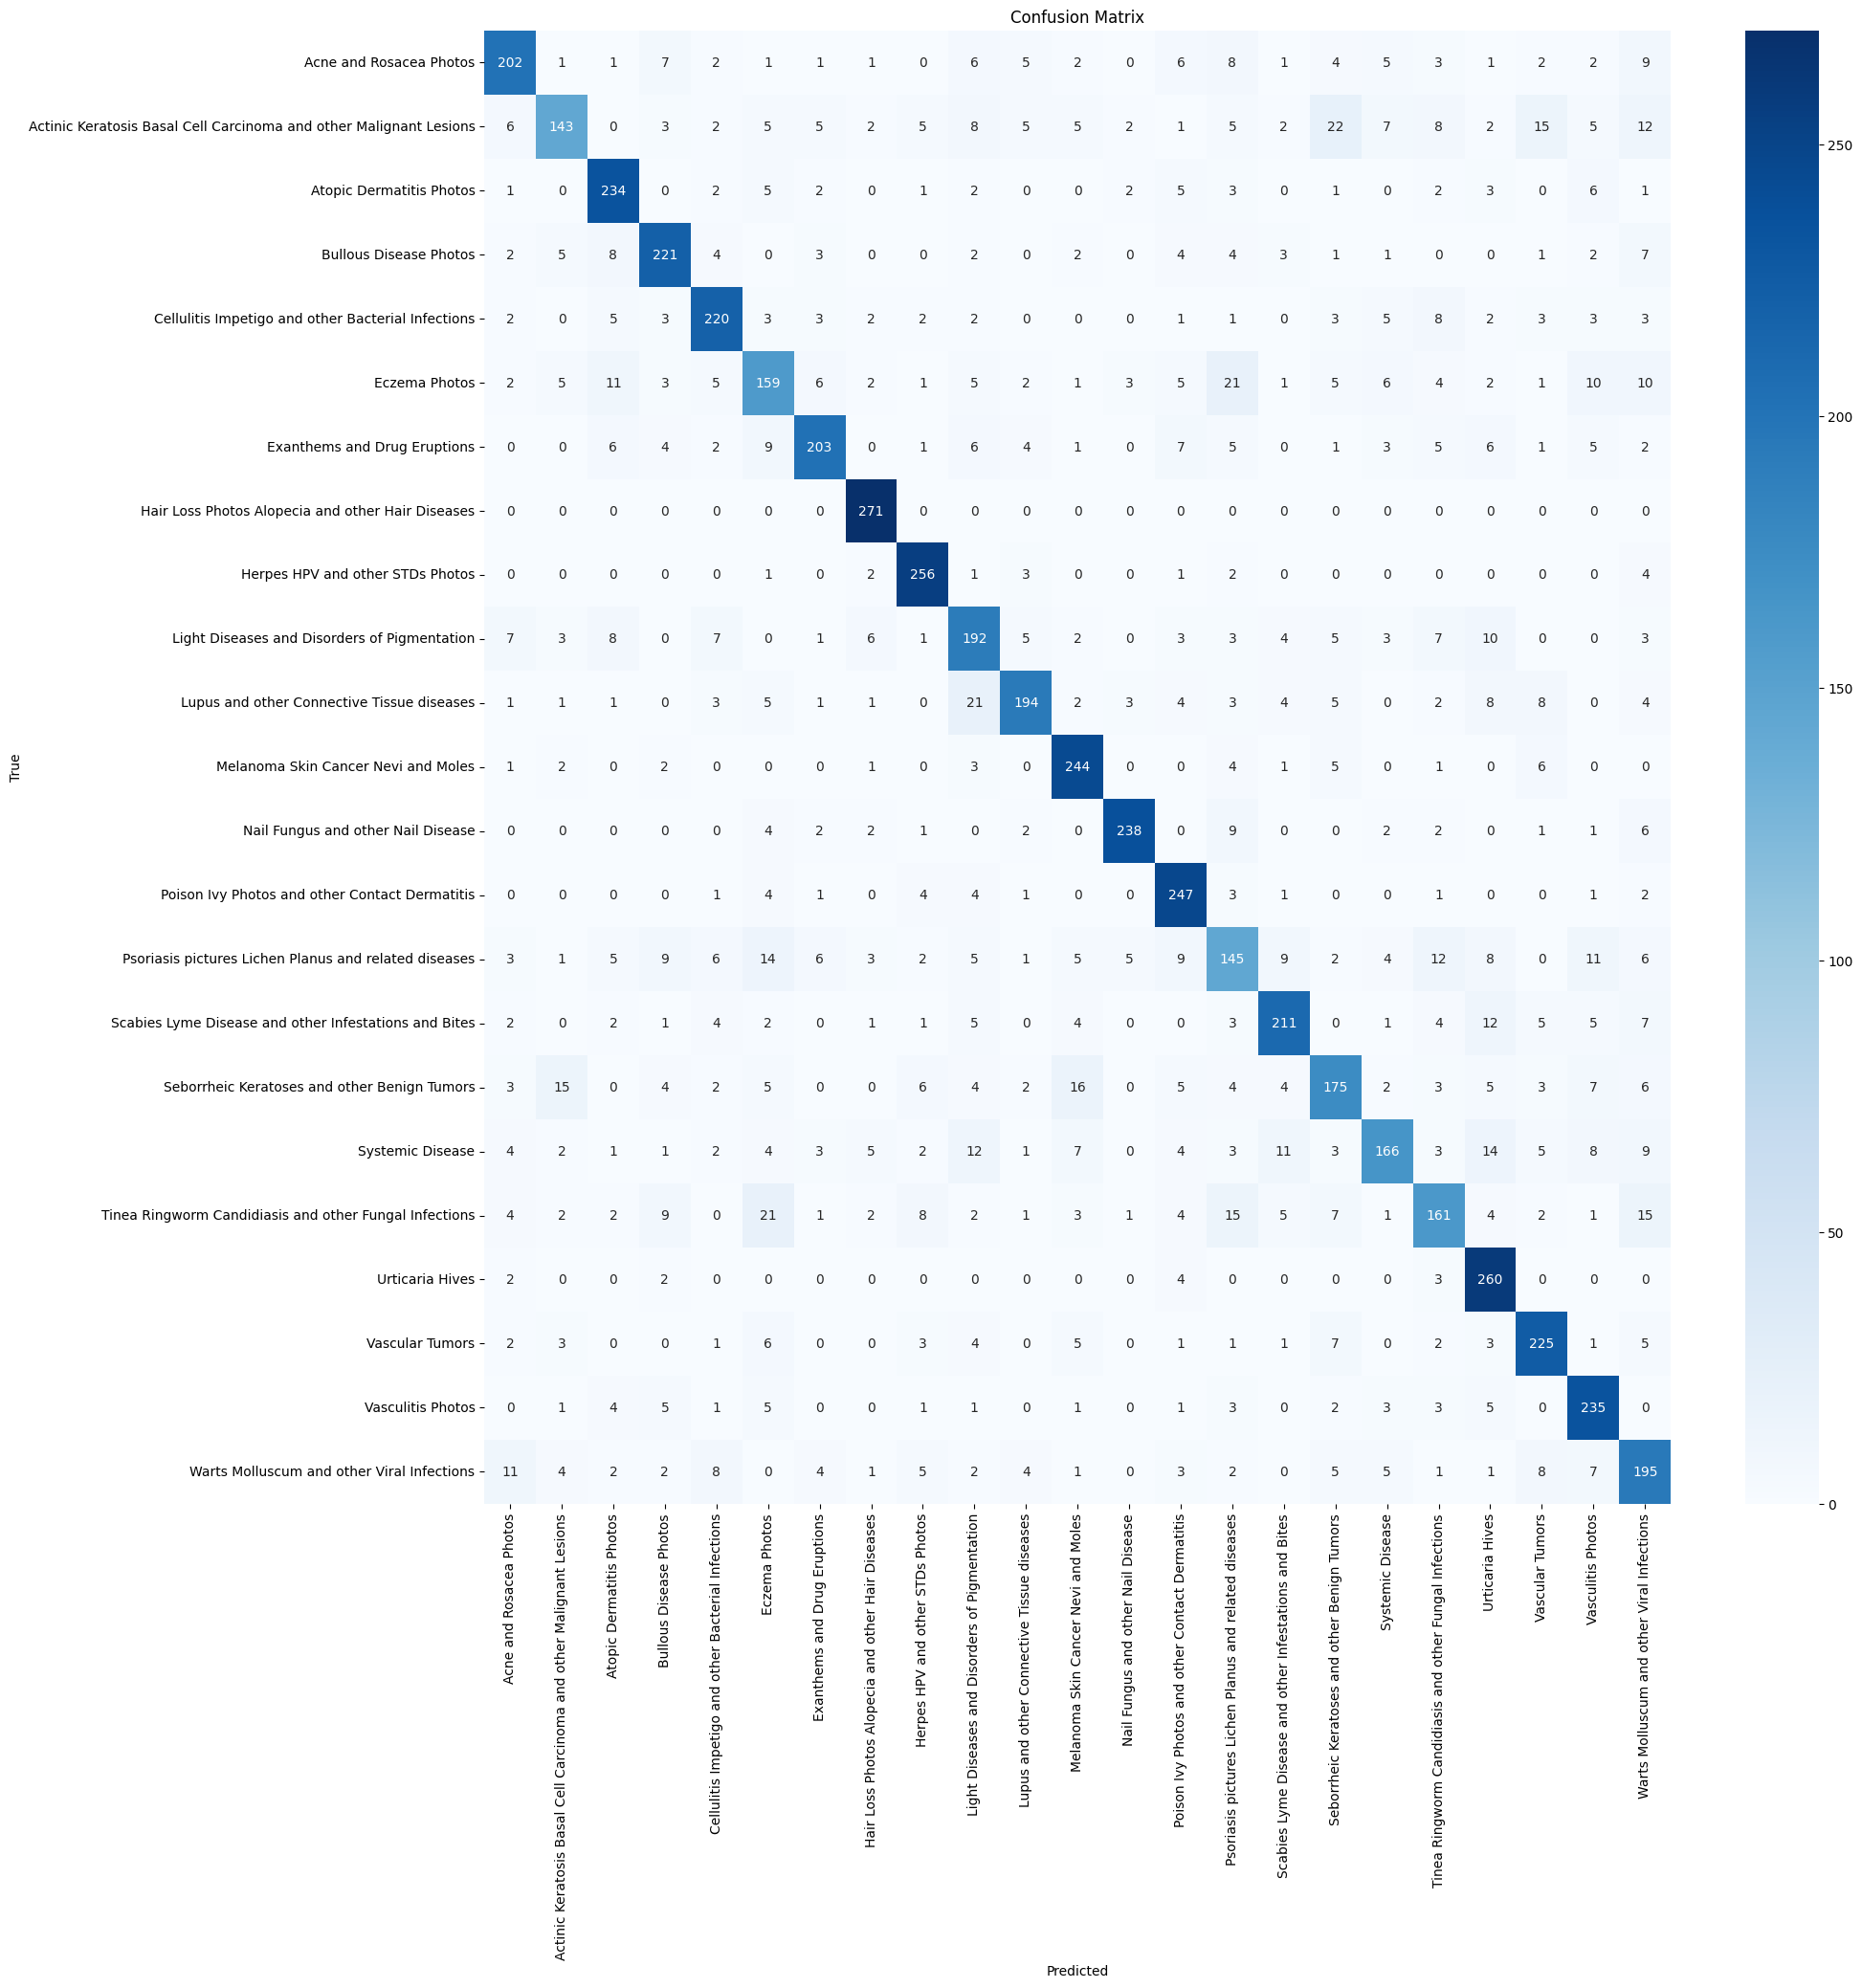

In [21]:
# 1. Evaluate
val_loss, val_accuracy = model.evaluate(val_ds)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

# 2. Predict
y_pred_probs = model.predict(val_ds)
y_pred = np.argmax(y_pred_probs, axis=1)
# Get true labels from one-hot encoded validation set
y_true = []
for images, labels in val_ds.unbatch():
    y_true.append(np.argmax(labels.numpy()))
y_true = np.array(y_true)


# Import necessary libraries
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 3. Classification Report
print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))

# 4. Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(20, 20))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Testing accuracy on unknown dataset

### Importing Test dataset

In [22]:
# Define the root directory of your training dataset
Test_root_dir = "/kaggle/input/dermnet/test"

# Initialize lists to store image paths and labels
Test_image_paths = []
Test_labels = []

# Traverse the directory
for subdir, _, files in os.walk(Test_root_dir):
    for file in files:
        # Check if the file is an image
        if any(file.lower().endswith(ext) for ext in image_extensions):
            # Get the full path of the image
            image_path = os.path.join(subdir, file)

            # Get the label(folder name)
            label = os.path.basename(subdir)
            #append to lists
            Test_image_paths.append(image_path)
            Test_labels.append(label)

#Create a dataframe
df_Test = pd.DataFrame({'Image_Path': Test_image_paths, 'Disease': Test_labels})
df_Test

Image_Path  \
0     /kaggle/input/dermnet/test/Light Diseases and ...   
1     /kaggle/input/dermnet/test/Light Diseases and ...   
2     /kaggle/input/dermnet/test/Light Diseases and ...   
3     /kaggle/input/dermnet/test/Light Diseases and ...   
4     /kaggle/input/dermnet/test/Light Diseases and ...   
...                                                 ...   
3997  /kaggle/input/dermnet/test/Warts Molluscum and...   
3998  /kaggle/input/dermnet/test/Warts Molluscum and...   
3999  /kaggle/input/dermnet/test/Warts Molluscum and...   
4000  /kaggle/input/dermnet/test/Warts Molluscum and...   
4001  /kaggle/input/dermnet/test/Warts Molluscum and...   

                                           Disease  
0     Light Diseases and Disorders of Pigmentation  
1     Light Diseases and Disorders of Pigmentation  
2     Light Diseases and Disorders of Pigmentation  
3     Light Diseases and Disorders of Pigmentation  
4     Light Diseases and Disorders of Pigmentation  
...                                            ...  
3997    Warts Molluscum and other Viral Infections  
3998    Warts Molluscum and other Viral Infections  
3999    Warts Molluscum and other Viral Infections  
4000    Warts Molluscum and other Viral Infections  
4001    Warts Molluscum and other Viral Infections  

[4002 rows x 2 columns]

### Removing Corrupt images and Encoding labels

In [23]:
df_Test = df_Test[df_Test['Image_Path'].apply(is_valid_image)]

In [24]:
df_Test['label_encoded'] = label_encoder.transform(df_Test['Disease'])

### Creating Test data Tensors data

In [25]:
Test_paths = df_Test["Image_Path"]
Test_labels = df_Test["label_encoded"]

Test_ds = tf.data.Dataset.from_tensor_slices((Test_paths.values, tf.one_hot(Test_labels.values, depth=23)))

# Map preprocessing by reusing preprocessing_val
Test_ds = Test_ds.map(preprocess_val, num_parallel_calls=tf.data.AUTOTUNE)

# Shuffle, Batch, Prefetch
Test_ds = Test_ds.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

### Getting model predictions

In [26]:
# Make predictions (output will be probabilities for each class)
test_predictions = model.predict(Test_ds)

126/126 ━━━━━━━━━━━━━━━━━━━━ 12s 93ms/step


### Converting predictions to class labels

In [27]:
# Convert probabilities to class indices
predicted_classes = np.argmax(test_predictions, axis=1)

### Getting true labels

In [28]:
# Method 1: From your original DataFrame
true_classes = df_Test['label_encoded'].values

### Evaluating on Test dataset

#### Classification report

In [29]:
from sklearn.metrics import classification_report

print(classification_report(
    true_classes,
    predicted_classes,
    target_names=label_encoder.classes_  # Use your original label names
))

                                                                    precision    recall  f1-score   support

                                           Acne and Rosacea Photos       0.72      0.70      0.71       312
Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions       0.60      0.45      0.51       288
                                          Atopic Dermatitis Photos       0.36      0.53      0.43       123
                                            Bullous Disease Photos       0.36      0.42      0.39       113
                Cellulitis Impetigo and other Bacterial Infections       0.23      0.33      0.27        73
                                                     Eczema Photos       0.53      0.43      0.48       309
                                      Exanthems and Drug Eruptions       0.44      0.45      0.44       101
                 Hair Loss Photos Alopecia and other Hair Diseases       0.40      0.82      0.54        60
                           

#### Confusion Matrix

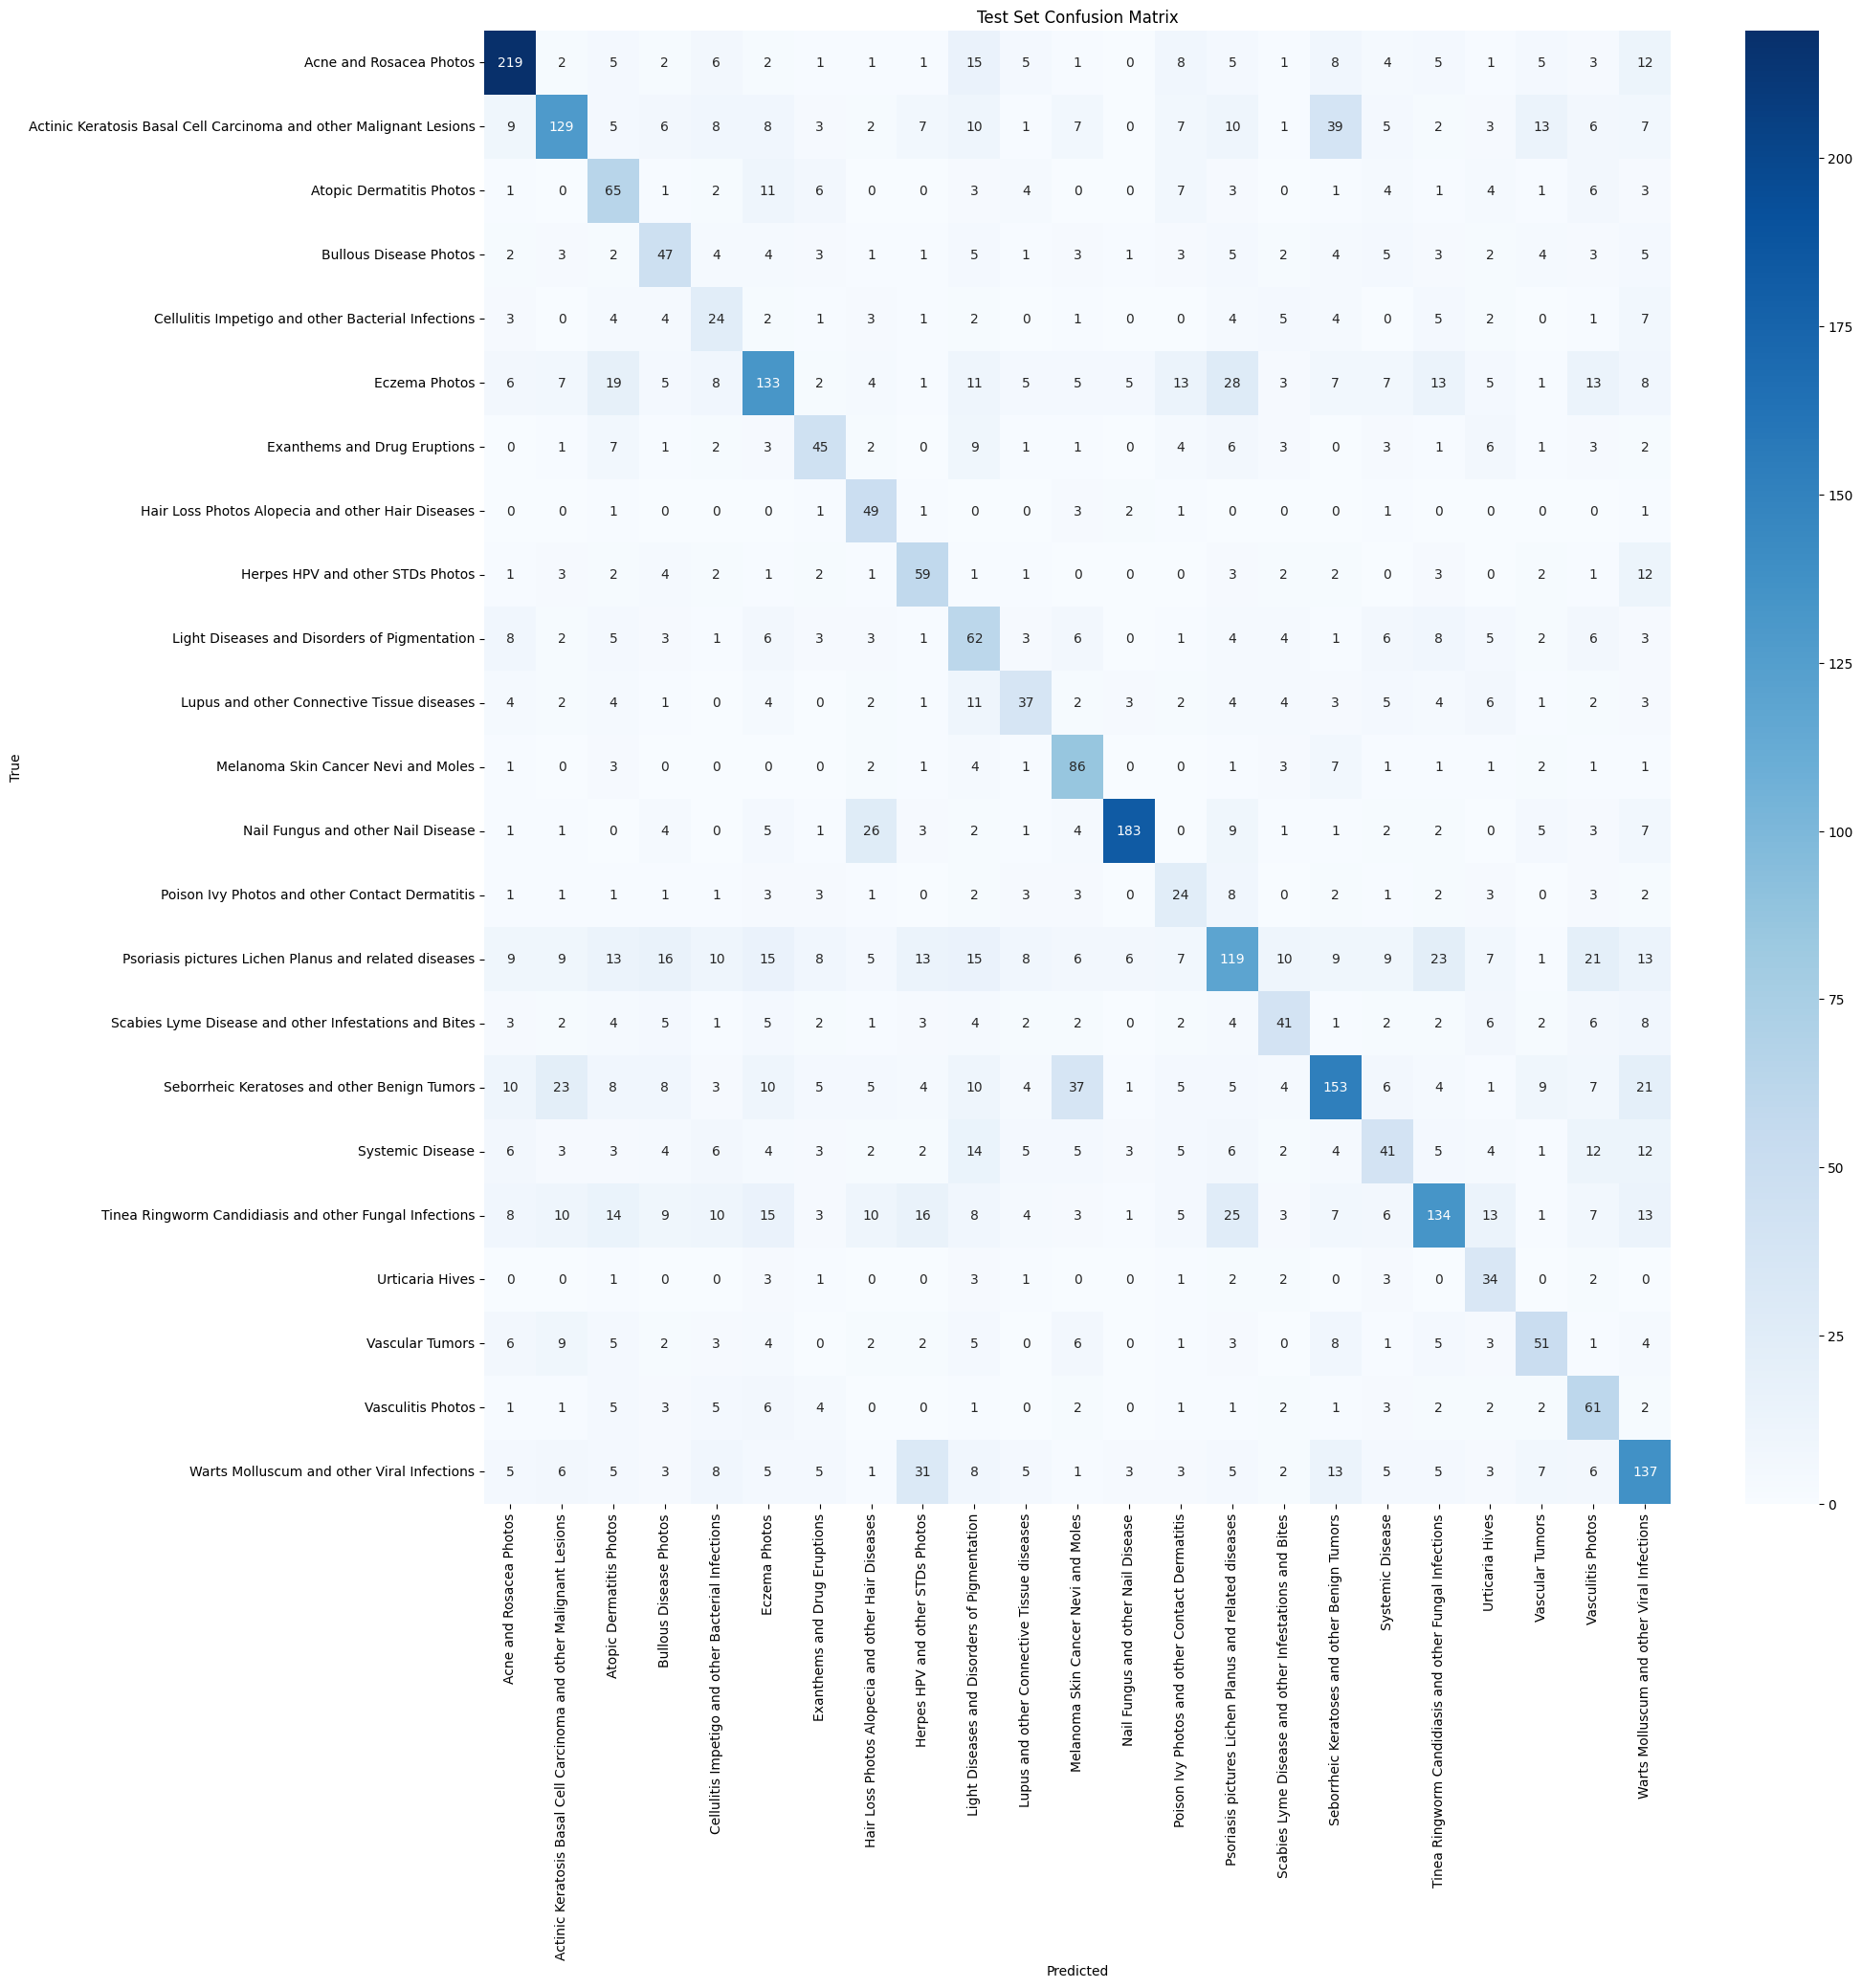

In [30]:
cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(20, 20))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Test Set Confusion Matrix')
plt.show()

#### Additional Metrics

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

test_accuracy = accuracy_score(true_classes, predicted_classes)
test_precision = precision_score(true_classes, predicted_classes, average='weighted')
test_recall = recall_score(true_classes, predicted_classes, average='weighted')
test_f1 = f1_score(true_classes, predicted_classes, average='weighted')

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test F1-Score: {test_f1:.4f}")

Test Accuracy: 0.4830
Test Precision: 0.5097
Test Recall: 0.4830
Test F1-Score: 0.4864


In [32]:
# Evaluate using model.evaluate() for loss and accuracy
test_loss, test_acc = model.evaluate(Test_ds)
print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

126/126 ━━━━━━━━━━━━━━━━━━━━ 11s 87ms/step - accuracy: 0.4841 - loss: 2.1682

Test Loss: 2.1530
Test Accuracy: 0.4830


#### Per-class Analysis

In [33]:
from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1, support = precision_recall_fscore_support(
    true_classes,
    predicted_classes,
    labels=np.arange(len(label_encoder.classes_)))
    
class_metrics = pd.DataFrame({
    'Class': label_encoder.classes_,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1,
    'Support': support
})

print("\nPer-Class Metrics:")
print(class_metrics)


Per-Class Metrics:
                                                Class  Precision    Recall  \
0                             Acne and Rosacea Photos   0.720395  0.701923   
1   Actinic Keratosis Basal Cell Carcinoma and oth...   0.602804  0.447917   
2                            Atopic Dermatitis Photos   0.359116  0.528455   
3                              Bullous Disease Photos   0.364341  0.415929   
4   Cellulitis Impetigo and other Bacterial Infect...   0.230769  0.328767   
5                                       Eczema Photos   0.534137  0.430421   
6                        Exanthems and Drug Eruptions   0.441176  0.445545   
7   Hair Loss Photos Alopecia and other Hair Diseases   0.398374  0.816667   
8                    Herpes HPV and other STDs Photos   0.398649  0.578431   
9        Light Diseases and Disorders of Pigmentation   0.302439  0.433566   
10         Lupus and other Connective Tissue diseases   0.402174  0.352381   
11                Melanoma Skin Cancer Nevi 

#### Visual Inspection of Misclassified Examples

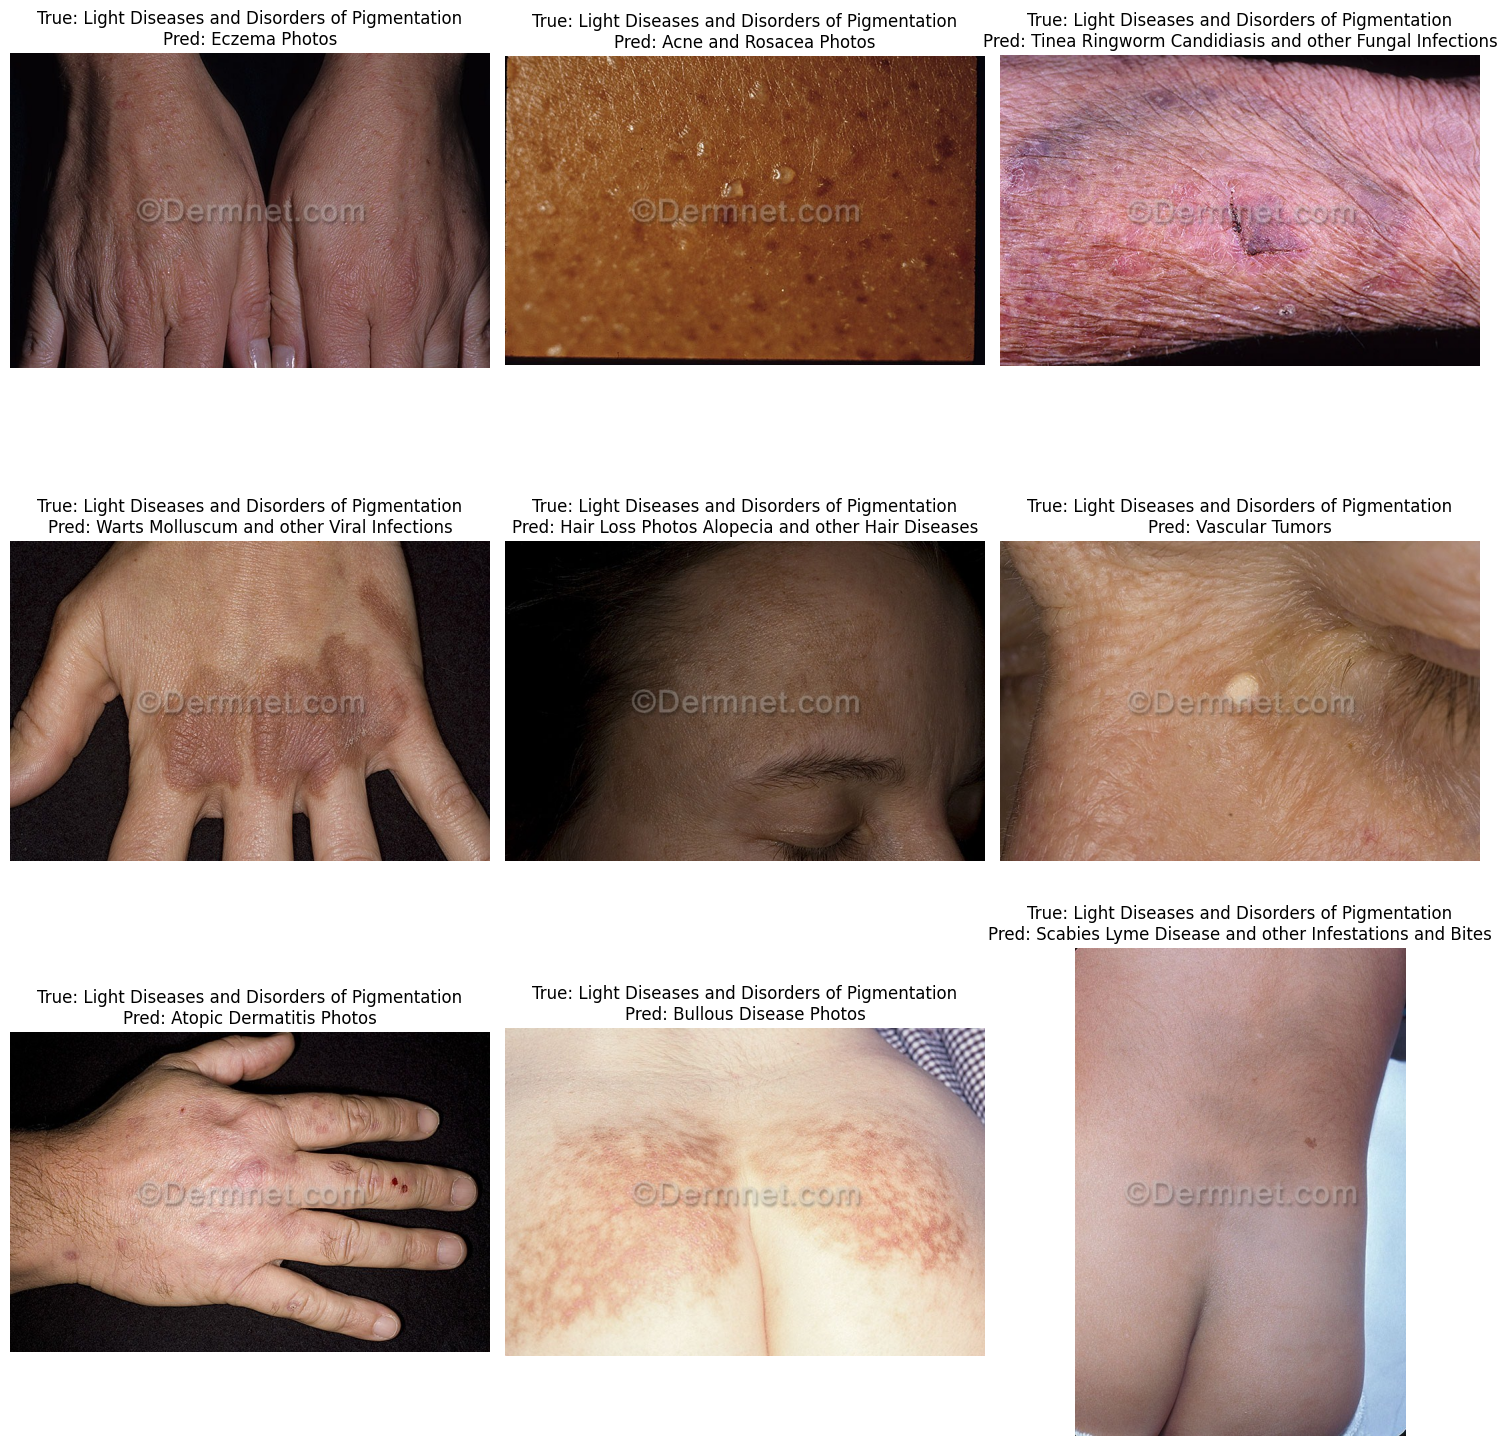

In [34]:
# Get misclassified examples
misclassified_idx = np.where(predicted_classes != true_classes)[0]
num_samples = min(9, len(misclassified_idx))  # Show up to 9 examples

plt.figure(figsize=(15, 15))
for i, idx in enumerate(misclassified_idx[:num_samples]):
    img_path = df_Test.iloc[idx]['Image_Path']
    true_label = label_encoder.classes_[true_classes[idx]]
    pred_label = label_encoder.classes_[predicted_classes[idx]]
    
    img = Image.open(img_path)
    plt.subplot(3, 3, i+1)
    plt.imshow(img)
    plt.title(f"True: {true_label}\nPred: {pred_label}")
    plt.axis('off')
plt.tight_layout()
plt.show()

## Saving Model

In [35]:
model.save('DermaLens.keras')  # New .keras format (recommended)